# Сборный проект: Выявление закономерностей определяющих успешность игры

### Изучение исходных данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Откроем имеющийся датасет:

In [2]:
# сохраним его в переменной df
df = pd.read_csv('/datasets/games.csv')
# выведем на экран первые 15 строк
display(df.head(15))
# и информацию о датафрейме
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных**

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Подготовка данных

### Работа с регистром

Сразу же заменим названия столбцов (понизим регистр) для удобства пользования:

In [3]:
df.columns = df.columns.str.lower()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

<s>При отработке данной вариации кода, у нас возникает потенциальная проблема – мы можем допустить ошибку в названиях столбцов и в последствии получить неверные расчеты.
    
Поэтому мы можем либо: 
    
- использовать метод `rename` 
- или применить метод  изменения регистра ниже

</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем к нижнему регистру также записи в столбцах *name*, *platform* и *genre*:

In [5]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()
df['rating'] = df['rating'].str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Работа с пропусками и преобразование типов

Проанализируем пропуски в даннных:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Пойдем по порядку:**  
В столбце *name* всего две строки с пропусками - поскольку их процент ничтожен просто удалим данные строки.

In [7]:
df = df.dropna(subset=['name'])

Посмотрим какое количество в процентном соотношении занимают пропуски значений в столбце *year_of_release*:

In [8]:
len(df[df['year_of_release'].isna() == 1]) / len(df['year_of_release'])

0.016095255190570215

Меньше 2-х процентов - смело удаляем:

In [9]:
df.dropna(subset=['year_of_release'], inplace=True)

Отсутсвие значений в таких столбцах как *critic_score* и *user_score* информативно - оно обозначает, что данного типа оценки играм не выставлялись - соотвественно пропуски в данных столбцах информативны, их мы оставим.  

Похожая ситуация с *rating* - вохзрастные рейтинги присваиваются далеко не всем играм (и только с определенного года), поэтому пропуски также информативны и трогать их мы не будем.


In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
df[df['user_score'] == 'tbd']['name'].count()

2376

Во время изучения уникальных значений столбца *user_score* обратило на себя внимание присутсвие значения 'tbd'. Скорее всего в данном случае указанная аббревиатура означает - To Be Determined, т.е. будет определено. Причина ее появления - опять же предположительно недостаточное количество оценок для определения рейтинга, т.е. на данный момент фактически отсутсвие значения.  Полезной информации для нас оно не представляет, а обрабатывать данные помешает - поэтому просто заменим его пропусками. 

In [12]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


 Теперь посмотрим какие данные нуждаются в преобразовании типа:
- *name* - object - ок;
- *platform* - object - ок;
- year_of_release - **_float64_ - преобразуем в _dt_**;
- genre - object - ок;
- na_sales - float64 - ок;
- eu_sales - float64 - ok;
- jp_sales - float64 - ok;
- other_sales -  float64 - ok;
- critic_score - float64 - ok;
- user_score  -  **_object_ - преобразуем в _float_**;
- rating - object - ok.

Начнем с *year_of_release*:

In [14]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

Теперь user_score:

In [15]:
df['user_score'] = df['user_score'].astype('float')

Проверим результат:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Еще и проверим на дубликаты:

In [17]:
df.duplicated().sum()

0

### Подсчет суммарных продаж в регионах 

Подсчитаем суммарные продажи по всем регионам и внесем отдельным столбцом во фрейм:

In [18]:
df.insert(8, 'all_sales', df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1))

In [19]:
#посмортим на результат
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN


## Исследовательский анализ данных

### Подсчет количества игр выпущенных в разные годы.

Создадим новую переменную в которую сгруппируем данные по клоичеству выпущенных игр по годам и отсортируем ее по возрастанию года.

In [20]:
years_df = pd.pivot_table(
    df[['name', 'year_of_release']],
    index='year_of_release',
    aggfunc='count'
).reset_index().sort_values(by='year_of_release')
#переназовем столбцы
years_df.columns = ['year_of_release', 'quantity'] 

Проверим результат:

In [21]:
years_df.head(15)

,year_of_release,quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


В целях упрощения анализа построим график с количеством игр по годам:

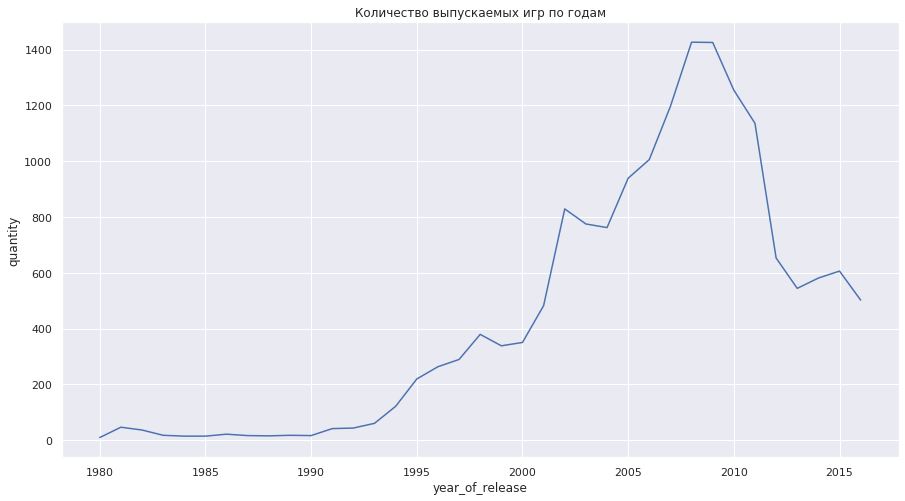

In [22]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('Количество выпускаемых игр по годам')
sns.lineplot(data=years_df, x='year_of_release', y='quantity')
plt.show()

Уточним сколько процентов занимает количество игр выпущенных до 1991г.

In [23]:
years_df[years_df['year_of_release'] <= 1990]['quantity'].sum() / years_df['quantity'].sum()

0.013439552420335685

В соответствии с полученными данными начало реального роста количества продаж видеоигр приходится на начало 1990-х. Пик выпуска - 2007-2009 годы. Данные по играм выпущенным в 80-х вряд ли имеют существенное значение для нашего исследования, в силу того что их количество в отношении к общему составляет менее полутора процентов.

### Изучение изменений продаж игр по платформам.

Подготовим данные для исследования. Сгруппируем их для начала по платформам со значениями по общим продажам.

In [24]:
p_sales = pd.pivot_table(df, index=['platform'], values='all_sales', aggfunc=['sum']).reset_index()
p_sales.columns = ['platform', 'all_sales']
p_sales = p_sales.sort_values(by='all_sales', ascending=False).reset_index(drop=True)
p_sales

,platform,all_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


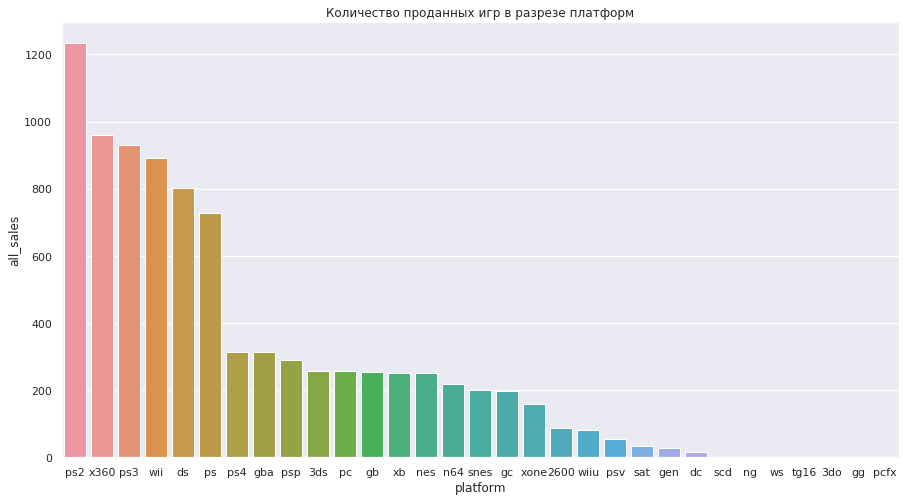

In [25]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('Количество проданных игр в разрезе платформ')
sns.barplot(data=p_sales, x='platform', y='all_sales')
plt.show()

Подсчитаем сколько от общего числа занимают продажи на платформах от 22 индекса в таблице и ниже.

In [26]:
p_sales.loc[23:, 'all_sales'].sum() / p_sales['all_sales'].sum()

0.00238247316597784

Как мы видим после платформы xone идет резкое снижение, после dc (включая) данные уже не представляют интереса для дальнейшего исследования в силу малочисленности результатов продаж и незначительности их доли в общем количестве.  
Соответсвенно по данному расчету и выберем основные платформы по которым будем строить распределение по годам.

In [27]:
P_sales_clear = p_sales.loc[:22]
P_sales_clear

,platform,all_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


Теперь сделаем разбивку по годам, платформам и общим продажам.

In [28]:
Y_P_sales = pd.pivot_table(df, index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum').reset_index()
Y_P_sales.columns = ['platform', 'year_of_release', 'all_sales_year']
Y_P_sales.head(15)

,platform,year_of_release,all_sales_year
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.94
8,2600,1988,0.74
9,2600,1989,0.63


И объединим эти данные по платформам.

In [29]:
df_y_p = P_sales_clear.merge(Y_P_sales, on='platform', how='left')
df_y_p.pop('all_sales')
df_y_p.head(15)

,platform,year_of_release,all_sales_year
0,ps2,2000,39.17
1,ps2,2001,166.43
2,ps2,2002,205.38
3,ps2,2003,184.31
4,ps2,2004,211.81
5,ps2,2005,160.66
6,ps2,2006,103.42
7,ps2,2007,75.99
8,ps2,2008,53.90
9,ps2,2009,26.40


Подсчитаем за какой характерный срок появляются новые и исчезают старые платформы.  
Для чего вычислим среднее время в течении которого выпускаются игры для одной платформы.

In [30]:
round(len(df_y_p['year_of_release']) / len(df_y_p['platform'].unique()))

9

Как мы видим в среднем игры на одной отдельно взятой платформе выходят в течении 9 лет.

### Определение актуального периода. Исследование продаж по платформам в актуальный период

В целях настоящего исследования в качестве актуального периода мы возьмем характерный срок за который появляются и исчезают платформы, т.е. в соответсвии с ранее полученными результатами - 9 лет.  
С учетом того, что крайние данные у нас по 2016 году - мы создадим выборку по данным с 2008 по 2016 годы включительно.

In [31]:
df_y_p_actual = df_y_p.query('year_of_release >= 2008')
df_y_p_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 8 to 205
Data columns (total 3 columns):
platform           80 non-null object
year_of_release    80 non-null int64
all_sales_year     80 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


Определим какие платформы лидируют по продажам, растут или падают, для чего построим соответсвующий график.

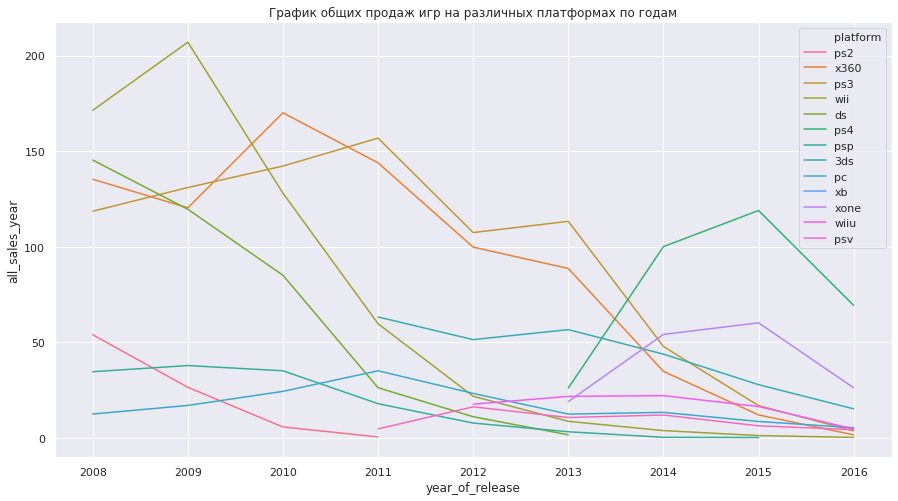

In [32]:
plt.title('График общих продаж игр на различных платформах по годам')
sns.lineplot(data=df_y_p_actual, x='year_of_release', y='all_sales_year', hue='platform')
plt.show()

In [33]:
df_y_p_actual.query('year_of_release == 2016').sort_values(by='all_sales_year', ascending=False)

,platform,year_of_release,all_sales_year
70,ps4,2016,69.25
184,xone,2016,26.15
96,3ds,2016,15.14
122,pc,2016,5.25
199,wiiu,2016,4.60
205,psv,2016,4.25
34,ps3,2016,3.60
23,x360,2016,1.52
45,wii,2016,0.18


По состоянию на 2016 год лидируют по продажам (в порядке убывания) следующие платформы - PS4, xone, 3dS, pc, wiiu.  
В соответствии с построенным графиком отмечается общая тенденция среди лидеров рынка на снижение продаж к 2016 году. Вместе с тем, вышеуказанные платформы сохраняют свое лидерство и скорее всего в дальнейшем по крайней мере в 2017 году его не потеряют. Соответственно данные платформы мы и определим как наиболее потенциально прибыльные.


### Построим boxplot по глобальным продажам игр в разбивке по платформам.

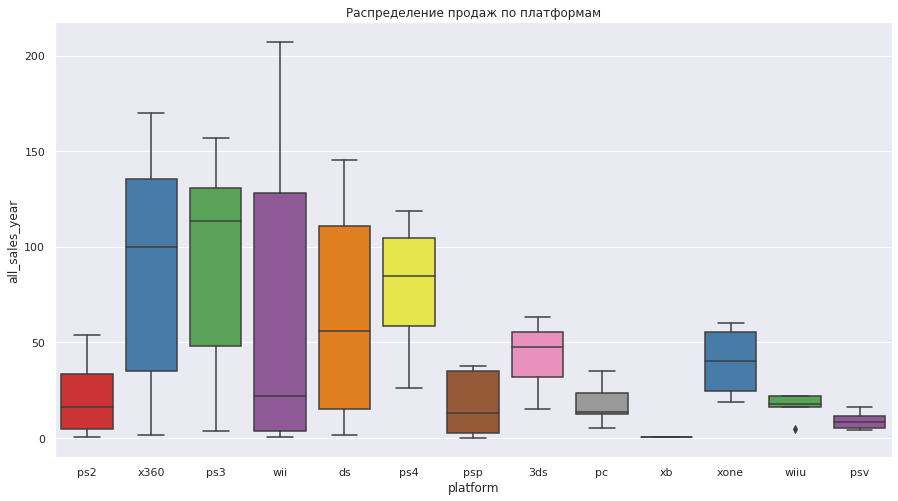

In [34]:
plt.title('Распределение продаж по платформам')
sns.boxplot(x='platform', y='all_sales_year', data=df_y_p_actual, palette='Set1')
plt.show()

Построение данного графика показало нам следующие результаты:  
- наиболее высоко, в том числе по отношению к собственному распределению находятся медианы количества продаж у x360 и ps3 и ps4, что говорит об усточивых высоких показателях продаж. Отдельно отметим, что как х360, так и ps3 по состоянию на 2016 год не актуальны - продажи на данных платформах минимальны;
- лидер по максимуму продаж за историю наблюдений wii - вместе с тем, данное лидерство фиксировалось в 2009 году, по состоянию на 2016 год - минимальные значения и тенденция к снижению, о чем опять же свидетельствует положение медианного значения.




### Изучение влияния рейтинга на продажи на отдельной платформе

С учетом ранее полученных сведений для дополнительного изучения выберем платформу **ps4**.

In [35]:
df_actual = df.query('year_of_release >= 2008')

df_ps4 = df_actual[df_actual['platform'] == 'ps4']
df_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,m
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,e
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,7.66,83.0,5.7,m


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  


#### Влияние оценок пользователей

Построим диаграмму рассеивания:

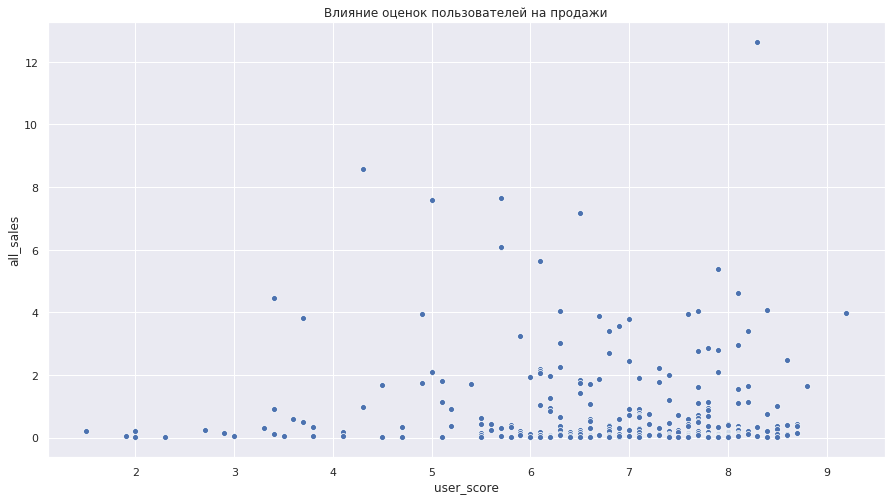

In [36]:
plt.title('Влияние оценок пользователей на продажи')
sns.scatterplot(data=df_ps4, x='user_score', y='all_sales')
plt.show()

Проверим корреляцию данных показателей:

In [37]:
df_ps4['user_score'].corr(df_ps4['all_sales'])

-0.031957110204556424

Полученные данные говорят нам фактически об отсутствии корреляции между оценками пользователей и общим объемом продаж.

Соответственно можно сделать вывод, что оценки пользователей прямого влияния на продажи не оказывают.

#### Влияние оценок экспертов

Построим диаграмму рассеивания:

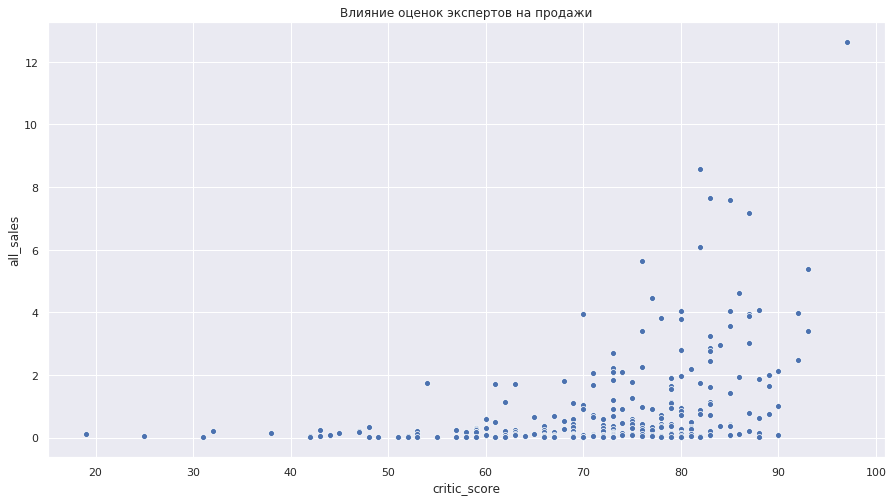

In [38]:
plt.title('Влияние оценок экспертов на продажи')
sns.scatterplot(data=df_ps4, x='critic_score', y='all_sales')
plt.show()

Проверим корреляцию данных показателей:

In [39]:
df_ps4['critic_score'].corr(df_ps4['all_sales'])

0.40656790206178095

Корреляция оценок критиков на продажи хоть и очень низкая, но все-таки присутствует.

Соответственно можно сделать вывод, что оценки критиков оказывают малое влияние на продажи.


### Влияние оценок критиков и пользователей по всем остальным платформам

#### Влияние оценок пользователей

Построим диаграмму рассеивания:

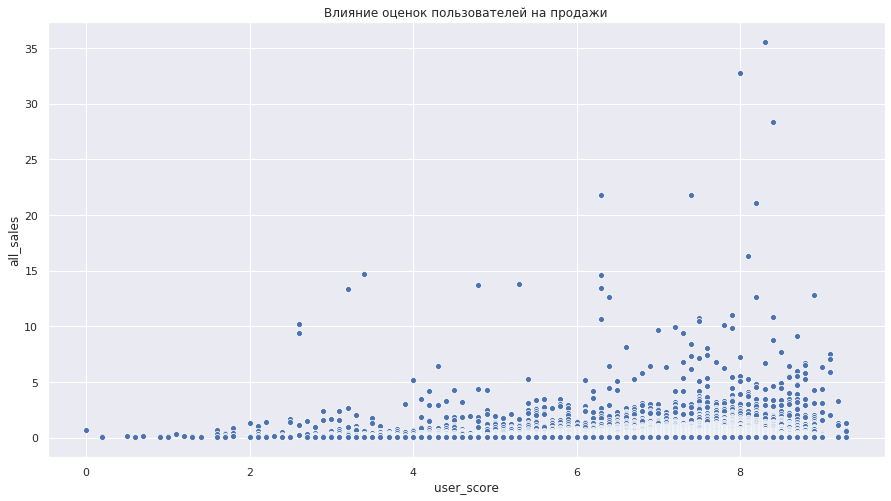

In [40]:
plt.title('Влияние оценок пользователей на продажи')
sns.scatterplot(data=df_actual[df_actual['platform'] != 'ps4'], x='user_score', y='all_sales')
plt.show()

Проверим корреляцию данных показателей:

In [41]:
df_actual[df_actual['platform'] != 'ps4']['user_score'].corr(df_actual[df_actual['platform'] != 'ps4']['all_sales'])

0.09261403098962476

Полученные данные говорят нам фактически об отсутствии корреляции между оценками пользователей и общим объемом продаж.

Соответственно можно сделать вывод, что оценки пользователей прямого влияния на продажи не оказывают.

#### Влияние оценок экспертов

Построим диаграмму рассеивания:

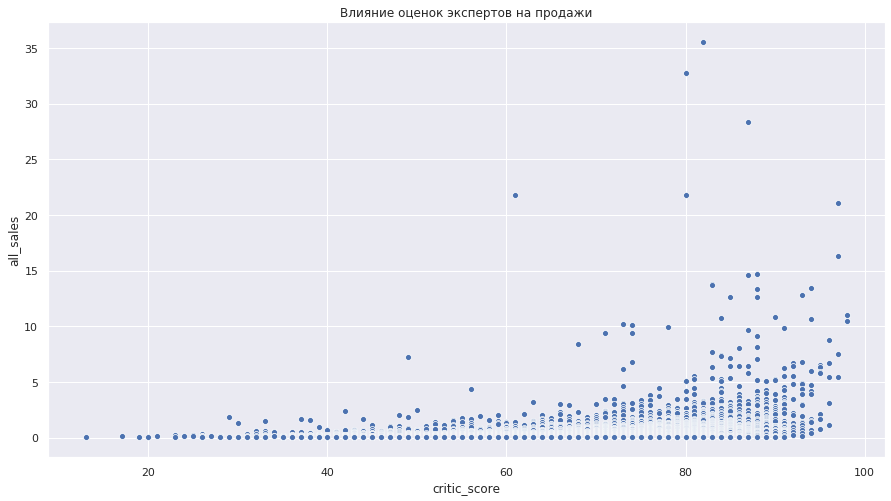

In [42]:
plt.title('Влияние оценок экспертов на продажи')
sns.scatterplot(data=df_actual[df_actual['platform'] != 'ps4'], x='critic_score', y='all_sales')
plt.show()

Проверим корреляцию данных показателей:

In [43]:
df_actual[df_actual['platform'] != 'ps4']['critic_score'].corr(df_actual[df_actual['platform'] != 'ps4']['all_sales'])

0.28603832726427914

Корреляция оценок критиков на продажи хоть и очень низкая но все таки присутсвует.

Соответсвенно можно сделать вывод, что оценки критиков оказвают малое влияние на продажи.

#### Вывод

Проведенный анализ показал, что по остальным платформам влияние оценок пользователей и критиков также фактически отсутсвует.

### Анализ продаж исходя из распределения игр по жанрам

Проведем группировку данных по жанрам с вычислением всех продаж.

In [44]:
genre = df_actual.pivot_table(index='genre', values='all_sales', aggfunc='sum').reset_index().sort_values(by='all_sales', ascending=False)
genre

,genre,all_sales
0,action,945.74
8,shooter,608.19
10,sports,560.34
7,role-playing,421.57
3,misc,396.43
6,racing,226.41
4,platform,195.38
9,simulation,150.78
2,fighting,148.51
1,adventure,105.86


Построим графики для визиулизации полученных данных.

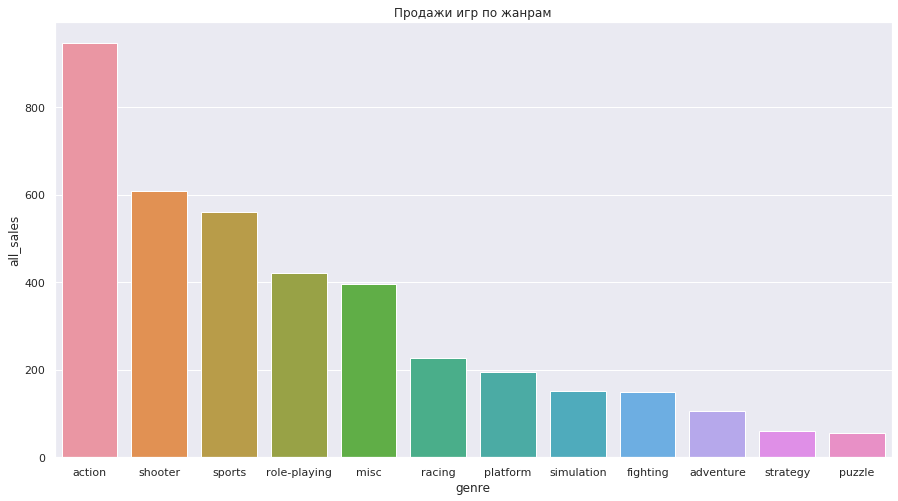

In [45]:
plt.title('Продажи игр по жанрам')
sns.barplot(data=genre, x='genre', y='all_sales')
plt.show()

Теперь круговой график - чтобы лучше понять соотношение.

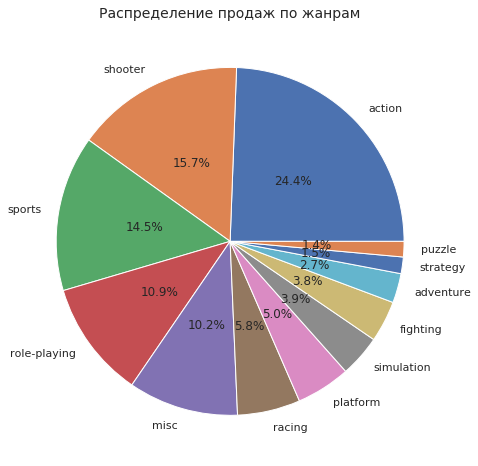

In [46]:
plt.pie(x=genre['all_sales'], autopct='%.1f%%', labels=genre['genre'], pctdistance=0.5)
plt.title('Распределение продаж по жанрам', fontsize=14);

**Вывод**

Однозначно самым популярным жанром является action (занимает около 25% от общего количества продаж). Также достаточно популярны такие жанры как shooter, sports, role-playing, misc: вместе с action их совокупная доля в общем количестве продаж составляет примерно 75 %. Соответственно на долю всех остальных жанров (7 наименований) приходится только 25%.

##  Портрет пользователя для каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5);
- самые популярные жанры (топ-5);
- влияет ли рейтинг ESRB на продажи в отдельном регионе.

### NA

Сгруппируем данные по популярности платформ в регионе *na*:

In [47]:
na_platform = pd.pivot_table(df_actual, index='platform', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
na_platform.head()

,platform,na_sales
11,x360,490.69
5,ps3,349.13
9,wii,332.87
2,ds,198.73
6,ps4,108.74


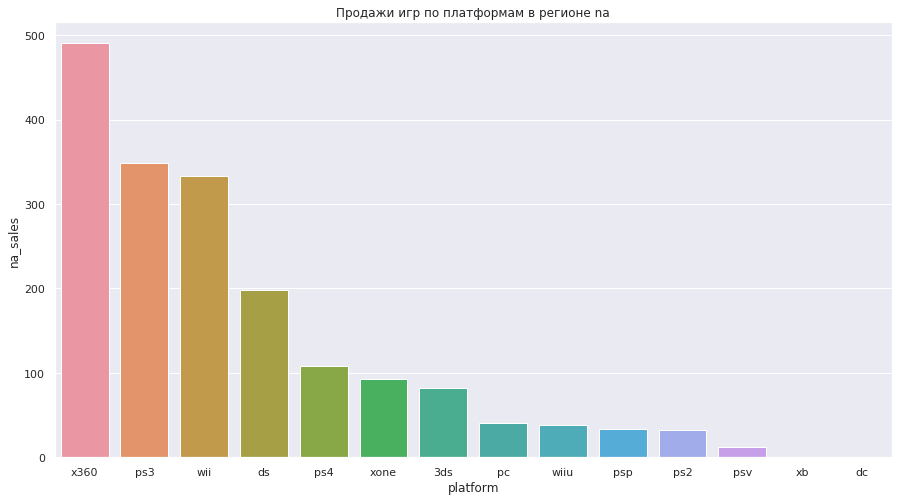

In [48]:
plt.title('Продажи игр по платформам в регионе na')
sns.barplot(data=na_platform, x='platform', y='na_sales')
plt.show()

Самые популярные платформы в регионе *na* (в порядке убывания):
- x360;
- ps3;
- wii;
- ds;
- ps4.

Оценим популярность различных жанров в данном регионе:

In [49]:
na_genre = pd.pivot_table(df_actual, index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
na_genre.head()

,genre,na_sales
0,action,433.74
8,shooter,311.26
10,sports,276.27
3,misc,211.61
7,role-playing,155.81


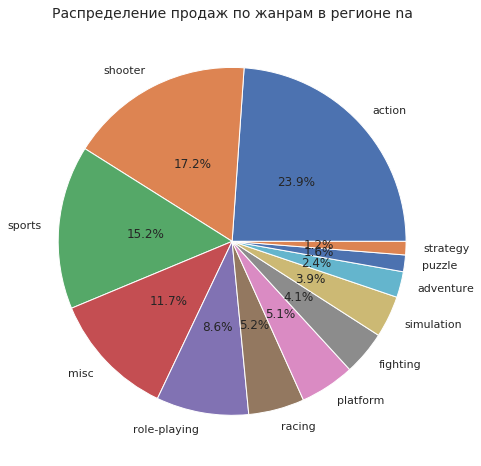

In [50]:
plt.pie(x=na_genre['na_sales'], autopct='%.1f%%', labels=na_genre['genre'], pctdistance=0.5)
plt.title('Распределение продаж по жанрам в регионе na', fontsize=14);

Самые популярные жанры в регионе *na* (в порядке убывания):
- action;
- shooter;
- sports;
- misc;
- role-playing.

Определим насколько влияет рейтинг ESRB на продажи в данном регионе.

Построим соответсвующую диаграмму рассеивания:

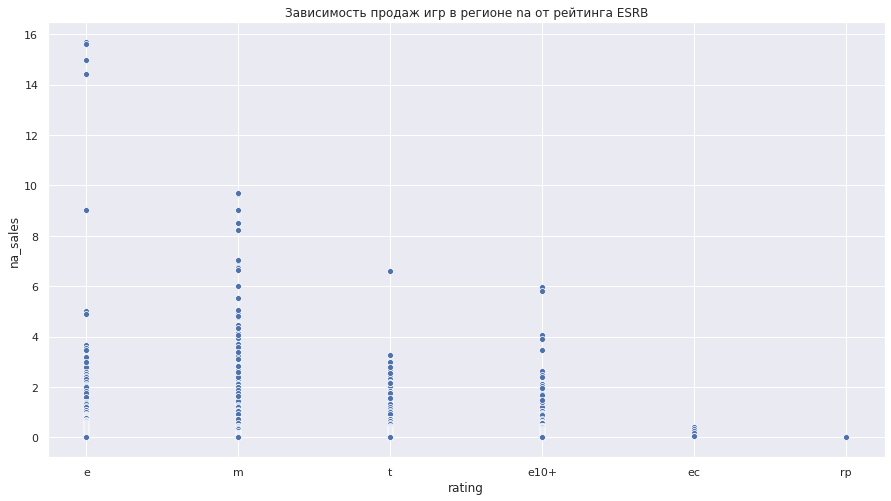

In [51]:
plt.title('Зависимость продаж игр в регионе na от рейтинга ESRB')
sns.scatterplot(data=df_actual, x='rating', y='na_sales')
plt.show()

Также построим столбчатую диаграмму:

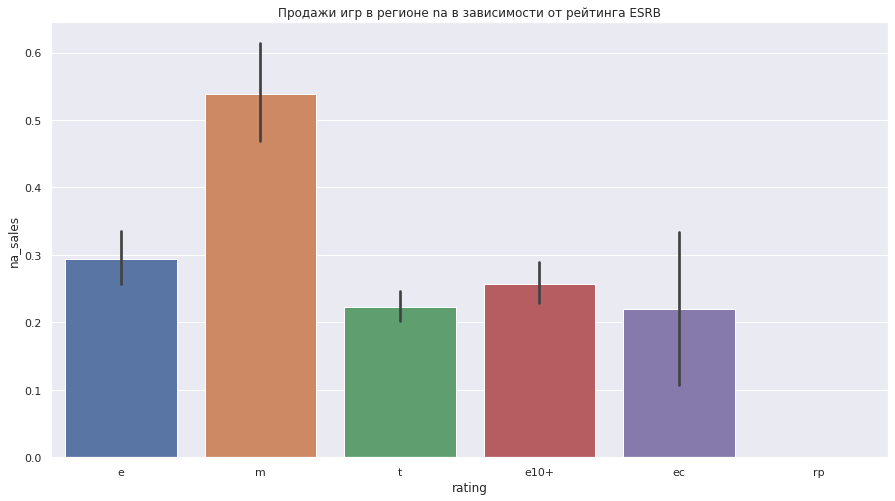

In [52]:
plt.title('Продажи игр в регионе na в зависимости от рейтинга ESRB')
sns.barplot(data=df_actual, x='rating', y='na_sales')
plt.show()

Игры для взрослых явно имеют большие продажи. Вместе с тем, дело скорее всего не в рейтинге как таковом, а просто в большей покупательской способности взрослых людей (решение о покупке игры они принимают самостоятельно в отличии от детей). В дальнейшем исследовании сравним данную тенденциию с другими регионами.

**Портрет пользователя региона na:**  
- наиболее распространнеными платформами в регионе являются:
    - x360;
    - ps3;
    - wii;
    - ds;
    - ps4.
- наиболее популярными жанрами в регионе являются:
    - action;
    - shooter;
    - sports;
    - misc;
    - role-playing.
- явное лидерство по продажам в регионе занимают игры для взрослых.

**Итак, исходя из полученных данных, типичный пользователь в регионе - взрослый который играет в action на приставке x360.** 

### EU

Сгруппируем данные по популярности платформ в регионе *eu*:

In [53]:
eu_platform = pd.pivot_table(df_actual, index='platform', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
eu_platform.head()

,platform,eu_sales
5,ps3,293.73
11,x360,234.88
9,wii,170.74
6,ps4,141.09
3,pc,92.17


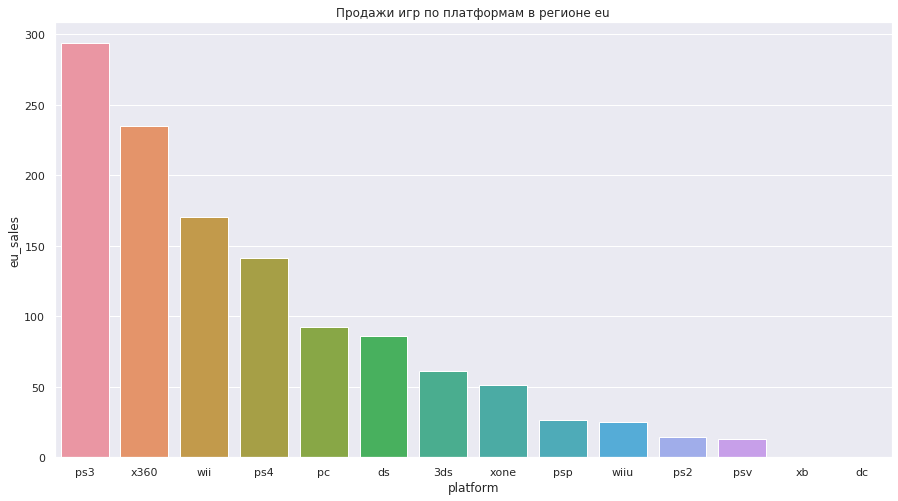

In [54]:
plt.title('Продажи игр по платформам в регионе eu')
sns.barplot(data=eu_platform, x='platform', y='eu_sales')
plt.show()

Самые популярные платформы в регионе *eu* (в порядке убывания):
- ps3;
- x360;
- wii;
- ps4;
- pc.

Оценим популярность различных жанров в данном регионе:

In [55]:
eu_genre = pd.pivot_table(df_actual, index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
eu_genre.head()

,genre,eu_sales
0,action,310.59
8,shooter,208.35
10,sports,185.19
3,misc,107.00
7,role-playing,94.46


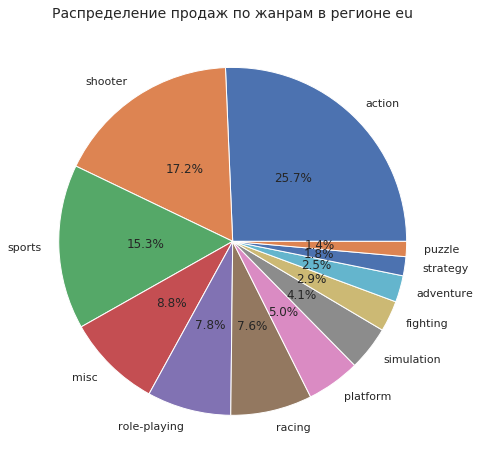

In [56]:
plt.pie(x=eu_genre['eu_sales'], autopct='%.1f%%', labels=eu_genre['genre'], pctdistance=0.5)
plt.title('Распределение продаж по жанрам в регионе eu', fontsize=14);

Самые популярные жанры в регионе *eu* (в порядке убывания):
- action;
- shooter;
- sports;
- misc;
- role-playing.

Определим насколько влияет рейтинг ESRB на продажи в данном регионе.

Построим соответсвующую диаграмму рассеивания:

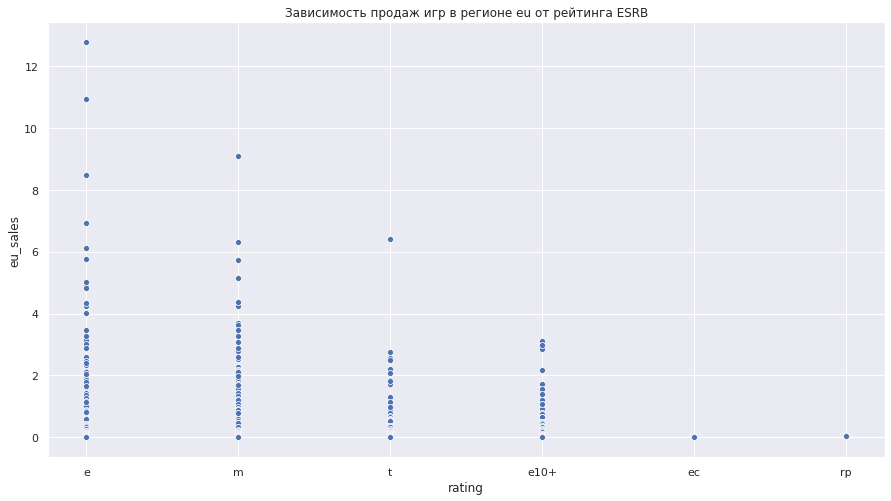

In [57]:
plt.title('Зависимость продаж игр в регионе eu от рейтинга ESRB')
sns.scatterplot(data=df_actual, x='rating', y='eu_sales')
plt.show()

Также построим столбчатую диаграмму:

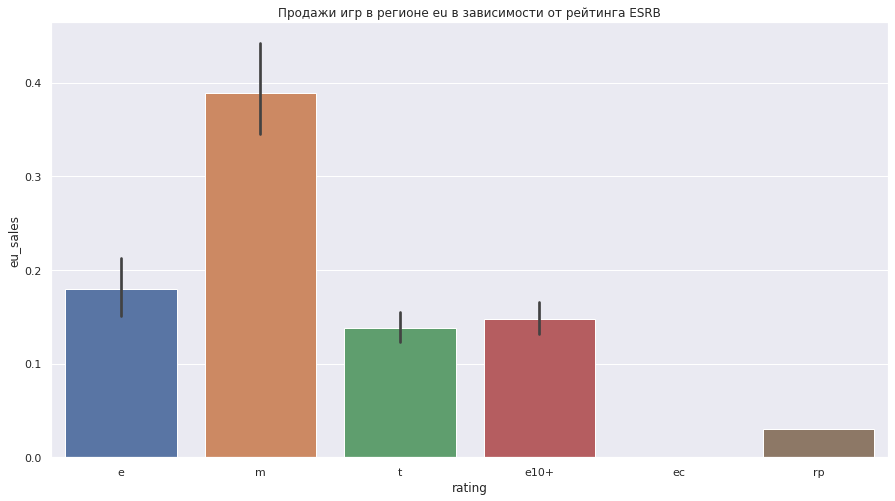

In [58]:
plt.title('Продажи игр в регионе eu в зависимости от рейтинга ESRB')
sns.barplot(data=df_actual, x='rating', y='eu_sales')
plt.show()

И снова игры для взрослых явно имеют большие продажи, причем в регионе eu данная тендеция еще больше выражена чем в na. 

**Портрет пользователя региона eu:**  
- наиболее распространнеными платформами в регионе являются:
    - ps3;
    - x360;
    - wii;
    - ps4;
    - pc.
- наиболее популярными жанрами в регионе являются:
    - action;
    - shooter;
    - sports;
    - misc;
    - role-playing.
- явное лидерство по продажам в регионе также занимают игры для взрослых.

**Итак, исходя из полученных данных, типичный пользователь в регионе - взрослый который играет в action на приставке ps3.** 

### JP

Сгруппируем данные по популярности платформ в регионе *jp*:

In [59]:
jp_platform = pd.pivot_table(df_actual, index='platform', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
jp_platform.head()

,platform,jp_sales
0,3ds,100.62
2,ds,76.12
5,ps3,74.11
7,psp,60.46
9,wii,47.01


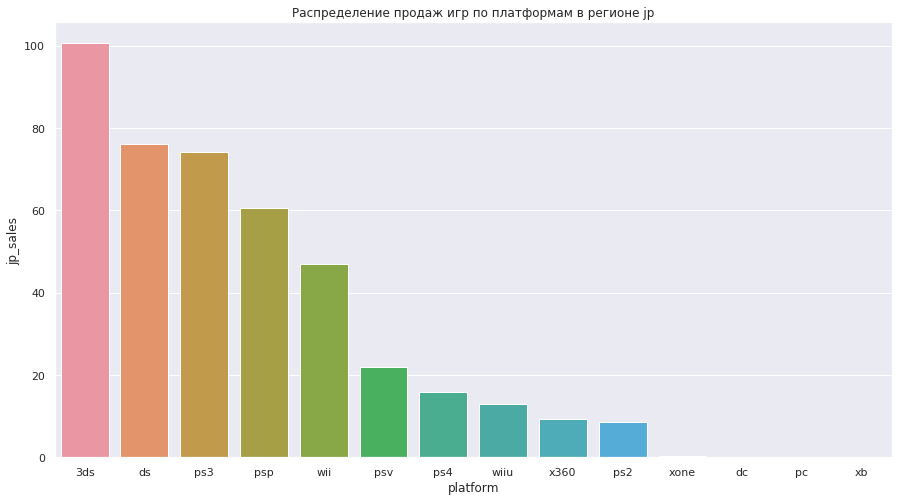

In [60]:
plt.title('Распределение продаж игр по платформам в регионе jp')
sns.barplot(data=jp_platform, x='platform', y='jp_sales')
plt.show()

Самые популярные платформы в регионе *jp* (в порядке убывания):
- 3ds;
- ds;
- ps3;
- psp;
- wii.

Оценим популярность различных жанров в данном регионе:

In [61]:
jp_genre = pd.pivot_table(df_actual, index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
jp_genre.head()

,genre,jp_sales
7,role-playing,138.12
0,action,90.16
3,misc,37.33
10,sports,30.69
1,adventure,23.36


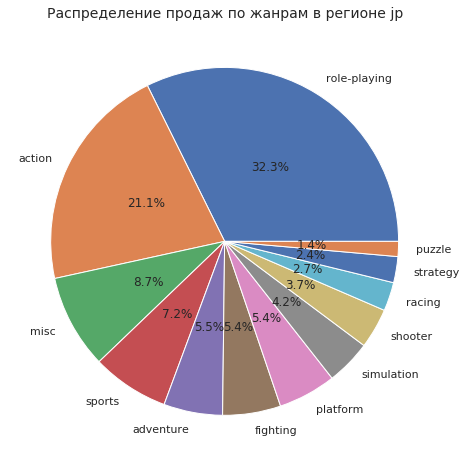

In [62]:
plt.pie(x=jp_genre['jp_sales'], autopct='%.1f%%', labels=jp_genre['genre'], pctdistance=0.5)
plt.title('Распределение продаж по жанрам в регионе jp', fontsize=14);

Самые популярные жанры в регионе *ja* (в порядке убывания):
- role-playing;
- action;
- misc;
- sports;
- adventure.

Определим насколько влияет рейтинг ESRB на продажи в данном регионе.

Построим соответсвующую диаграмму рассеивания:

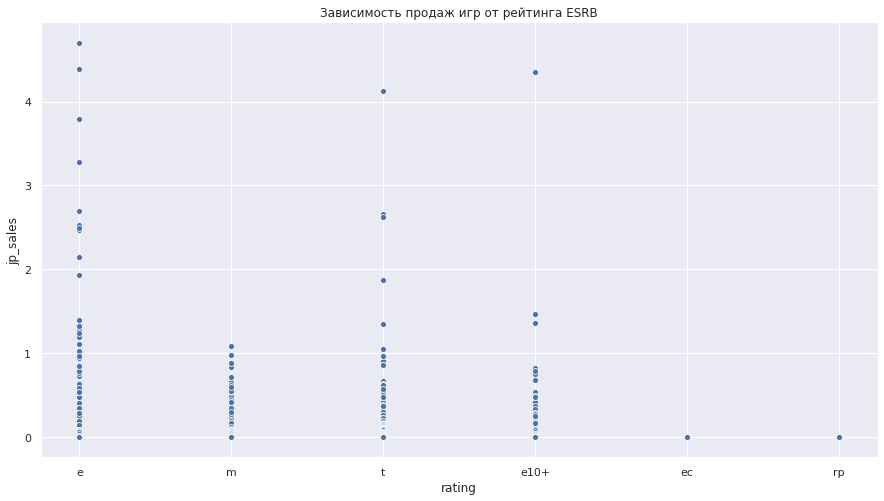

In [63]:
plt.title('Зависимость продаж игр от рейтинга ESRB')
sns.scatterplot(data=df_actual, x='rating', y='jp_sales')
plt.show()

Также построим столбчатую диаграмму:

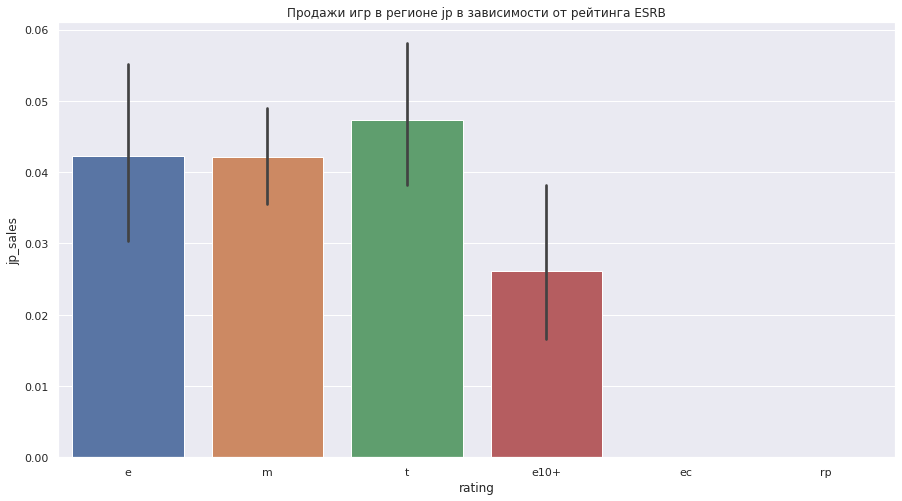

In [64]:
plt.title('Продажи игр в регионе jp в зависимости от рейтинга ESRB')
sns.barplot(data=df_actual, x='rating', y='jp_sales')
plt.show()

Регион *jp* и тут имеет значительные отличия - продажи игр как для детей разных возрастов, так и для взрослых практически равны.

**Портрет пользователя региона jp:**  
- наиболее распространнеными платформами в регионе являются:
    - 3ds;
    - ds;
    - ps3;
    - psp;
    - wii.
- наиболее популярными жанрами в регионе являются:
    - role-playing;
    - action;
    - misc;
    - sports;
    - adventure.
- продажи игр как для детей разных категорий возрастов, так и для взрослых практически равны. Вместе с тем, учитывая, что три из четырех популярных рейтингов описывают возможть играть в данные игры детьми - типичный игрок в японии все таки ребенок.

**Итак, исходя из полученных данных, типичный пользователь в регионе - несовершеннолетний который играет в role-playing на приставке 3ds.** 

### Общий вывод по разделу

Проведенное исследование показало нам, что в построении стратегий проникновения на разные рынки нельзя полагаться на общие данные, они могут сильно отличаться от имеющихся реальностей в регионах. Особенно отличается регион jp(судя по всему Япония) - все таки Европейский союз и США, в отличии от Японии достаточно близки культурологически, что объясняет схожесть их рынков.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для начал сформулируем нулевую гипотезу:

Н0: **Средние пользовательские рейтинги платформ Xbox One и PC совпадают.**

Соответсвенно сформулируем и альтернативную гипотезу:

Н1: **Средние пользовательские рейтинги платформ Xbox One и PC различаются.**

Мы сознательно выбираем двустороннюю гипотезу - поскольку оценки могут отличаться как в сторону увеличения, так и в сторону уменьшения. Также необходимо уточнить, что для проверки гипотезы нам придется сравнить две совокупности.

Первоначально, для того, чтобы корректно определить атрибут equal_var в Т–тесте сравним дисперсии данных выборок. 

In [65]:
xbox_one_score = df_actual[df_actual['platform'] == 'xone']['user_score'].dropna()
xbox_one_score.var()

1.9069968429360695

In [66]:
pc_score = df_actual[df_actual['platform'] == 'pc']['user_score'].dropna()
pc_score.var()

2.3624955611801597

Дополним изучение построением двойной гистограммы.

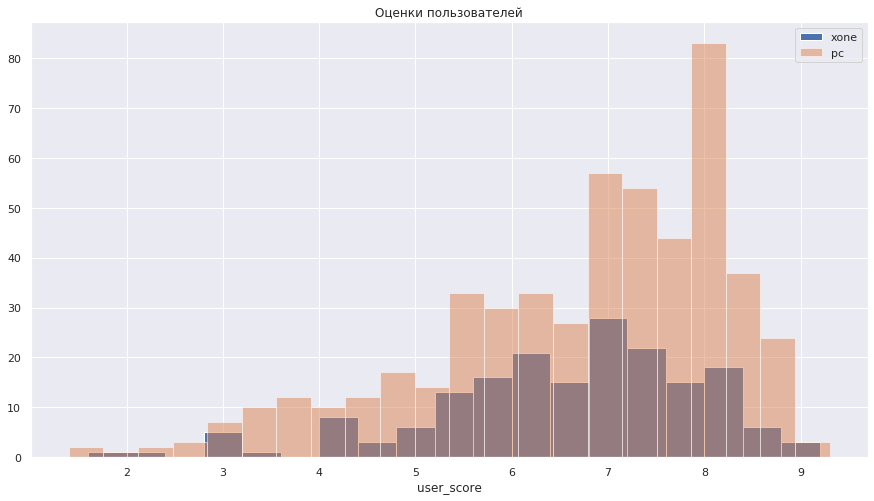

In [67]:
# с помощью формулы Стерджесса уточним сколько нам надо корзин:

b_xbox_one = int(np.ceil(1 + 3.32 * np.log(xbox_one_score.shape[0])))
b_pc = int(np.ceil(1 + 3.32 * np.log(pc_score.shape[0])))

plt.figure(figsize=(15,8))
sns.distplot(xbox_one_score, bins=b_xbox_one, kde=False, label='xone', hist_kws={'alpha':1})
sns.distplot(pc_score, bins=b_pc, kde=False, label='pc', hist_kws={'alpha':0.5})
plt.title('Оценки пользователей')
plt.legend()
plt.show()

Мы видим что у обоих выборок распределения нормальные, дисперсии их достаточно близки (для ttest с учетом объема выборки можно считать, что равны).

Приступим к проведению ttest-а.

Пороговое значение установим на уровне 5%.

Для сравнения совокупностей будем использовать ttest_ind:

In [68]:
alpha = 0.05

results = st.ttest_ind(xbox_one_score, pc_score)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.1295458611061516
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Нулевая гипотеза подтвердилась - средние пользовательские рейтинги платформ Xbox One и PC совпадают. Что показывает нам, что в целом оценки игр игроками не зависят от той платформы на которой они в эту игру играют, здесь скорее всего более существенны иные факторы.

### Средние пользовательские рейтинги жанров Action  и Sports разные

Для начал сформулируем нулевую гипотезу:

Н0: **Средние пользовательские рейтинги жанров Action и Sports совпадают.**

Соответсвенно сформулируем и альтернативную гипотезу:

Н1: **Средние пользовательские рейтинги жанров Action и Sports различаются.**

Мы сознательно выбираем двустороннюю гипотезу - поскольку оценки могут отличаться как в сторону увеличения, так и в сторону уменьшения. Также необходимо уточнить, что для проверки гипотезы нам придется сравнить две совокупности.

Первоначально, для того, чтобы корректно определить атрибут equal_var в Т–тесте сравним дисперсии данных выборок. 

In [69]:
action = df_actual[df_actual['genre'] == 'action']['user_score'].dropna()
action.var()

1.8014074760580783

In [70]:
sports = df_actual[df_actual['genre'] == 'sports']['user_score'].dropna()
sports.var()

2.927132150331709

Дополним изучение построением двойной гистограммы.

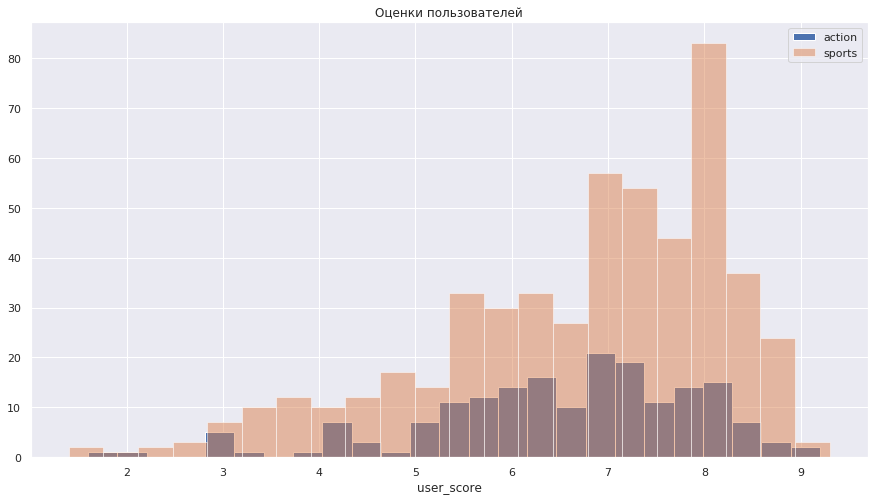

In [71]:
# с помощью формулы Стерджесса уточним сколько нам надо корзин:

b_action = int(np.ceil(1 + 3.32 * np.log(action.shape[0])))
b_sports = int(np.ceil(1 + 3.32 * np.log(sports.shape[0])))

plt.figure(figsize=(15,8))
sns.distplot(xbox_one_score, bins=b_action, kde=False, label='action', hist_kws={'alpha':1})
sns.distplot(pc_score, bins=b_sports, kde=False, label='sports', hist_kws={'alpha':0.5})
plt.title('Оценки пользователей')
plt.legend()
plt.show()

Мы видим что у обоих выборок распределения нормальные, дисперсии их достаточно близки (для ttest с учетом объема выборки можно считать, что равны).

Приступим к проведению ttest-а.

Пороговое значение установим на уровне 5%.

Для сравнения совокупностей будем использовать ttest_ind:

In [72]:
alpha = 0.05

results = st.ttest_ind(action, sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.9150743334562065e-15
Отвергаем нулевую гипотезу


**Вывод**

Нулевая гипотеза не подтвердилась средние пользовательские рейтинги жанров Action и Sports различаются. Таким образом пользовательские оценки зависят от жанра игры.

## Общий вывод

По результатам нашего исследования мы установили следующее:
-  начало реального роста количества продаж видеоигр приходится на начало 1990-х. Пик выпуска - 2007-2009 годы. Данные по играм выпущенным в 80-х вряд ли имеют существенное значение для нашего исследования, в силу того что их количество в отношении к общему составляет менее полутора процентов;
- в среднем игры на одной отдельно взятой платформе выходят в течении 9 лет;
- по состоянию на 2016 год лидируют по продажам (в порядке убывания) следующие платформы - PS4, xone, 3dS, pc, wiiu. Общая тенденция среди лидеров рынка на снижение продаж к 2016 году. Вместе с тем, вышеуказанные платформы сохраняют свое лидерство и скорее всего в дальнейшем по крайней мере в 2017 году его не потеряют. Соответственно данные платформы мы и определим как наиболее потенциально прибыльные.
- полученные данные в ходе изучение влияния рейтинга на продажи на отдельной платформе показали нам фактически отсутствие корреляции между оценками пользователей и общим объемом продаж. Соответственно можно сделать вывод, что оценки пользователей прямого влияния на продажи не оказывают. 
- при этом корреляция оценок критиков на продажи хоть и очень низкая, но все-таки присутствует. Соответственно можно сделать вывод, что оценки критиков оказывают малое влияние на продажи.
- изучение аналогичных данных по иным платформам подтвердили вышеуказанные выводы о корреляции оценок на продажи;
- в цеолм по изучаемым регионам самым популярным жанром является action (занимает около 25% от общего количества продаж). Также достаточно популярны такие жанры как shooter, sports, role-playing, misc: вместе с action их совокупная доля в общем количестве продаж составляет примерно 75 %. Соответственно на долю всех остальных жанров (7 наименований) приходится только 25%;
- одновременно проведенное исследование показало нам, что в построении стратегий проникновения на разные рынки нельзя полагаться на общие данные, они могут сильно отличаться от имеющихся реальностей в регионах. Особенно отличается регион jp(судя по всему Япония) - все таки Европейский союз и США, в отличии от Японии достаточно близки культурологически, что объясняет схожесть их рынков;
- средние пользовательские рейтинги платформ Xbox One и PC совпадают. Что показывает нам, что в целом оценки игр игроками не зависят от той платформы на которой они в эту игру играют, здесь скорее всего более существенны иные факторы;
- нулевая гипотеза не подтвердилась средние пользовательские рейтинги жанров Action и Sports различаются. Таким образом пользовательские оценки зависят от жанра игры.
